<a href="https://colab.research.google.com/github/yahelrl19/ParkingLotProject/blob/main/ParkingLotProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parking Lot Project

Link: https://paperswithcode.com/paper/revising-deep-learning-methods-in-parking-lot

GitHub: https://github.com/eighonet/parking-research

Dataset: https://www.kaggle.com/datasets/braunge/aerial-view-car-detection-for-yolov5/data


TODO:
* Descarga y extracción del dataset
* Visualización de 5 imágenes aleatorias
* Parametros de las imágenes
* Modelo con imágenes del dataset
* Parametros del modelo
* Prueba del modelo con nuevas imágenes
* Modificar el dataset
* Visualizar 5 imágenes aleatorias
* Parametros de las imágenes
* Probar primer modelo con imagenes alteradas
* Modelo con imágenes alteradas
* Probar el anterior dataset con modelo creado de imagenes alteradas
* Comparación de estadísticas

Empezaremos descargando el dataset de Kaggle

In [1]:
!pip install -q torch torchvision matplotlib opencv-python scikit-learn

In [2]:
import os
import zipfile
import requests

# URL del dataset
dataset_url = 'https://www.kaggle.com/api/v1/datasets/download/braunge/aerial-view-car-detection-for-yolov5'  # Reemplaza con la URL del dataset
output_dir = '/content/dataset'  # Directorio donde se extraerán los archivos
zip_file = '/content/dataset.zip'

# Descarga del archivo .zip
print("Descargando dataset...")
response = requests.get(dataset_url, stream=True)
with open(zip_file, 'wb') as f:
    f.write(response.content)
print(f"Dataset descargado en: {zip_file}")

# Crear el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Extraer el archivo .zip
print("Extrayendo dataset...")
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)
print(f"Dataset extraído en: {output_dir}")

# Limpieza opcional: elimina el archivo .zip para ahorrar espacio
os.remove(zip_file)
print("Archivo .zip eliminado.")

Descargando dataset...
Dataset descargado en: /content/dataset.zip
Extrayendo dataset...
Dataset extraído en: /content/dataset
Archivo .zip eliminado.


Exploremos el dataset

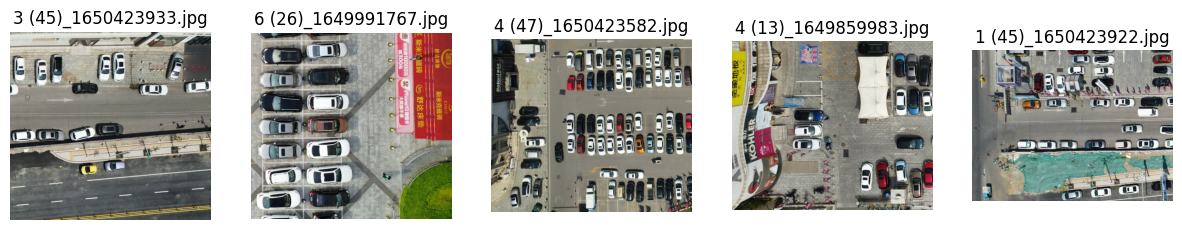

In [4]:
# prompt: Mostrar imagenes aleatorias del dataset descargado

import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta al directorio de imágenes
image_dir = '/content/dataset/mydata/mydata/images/test/'

# Obtener una lista de nombres de archivos de imagen
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Mostrar 5 imágenes aleatorias
num_images_to_show = 5
random_image_files = random.sample(image_files, num_images_to_show)

plt.figure(figsize=(15, 10))
for i, image_file in enumerate(random_image_files):
    img_path = os.path.join(image_dir, image_file)
    img = mpimg.imread(img_path)
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.show()

# Modelo de IA con el dataset original

In [8]:
import torch
import torchvision
from torchvision import transforms, datasets, models
from torchvision.models import ResNet18_Weights

# Directorio del dataset original
data_dir = '/content/dataset/mydata/mydata/images/'

# Transformaciones para el dataset original
original_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar a 224x224
    transforms.RandomHorizontalFlip(),  # Flipping horizontal aleatorio
    transforms.RandomRotation(15),  # Rotación aleatoria de ±15 grados
    transforms.ToTensor(),  # Convertir la imagen a un tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalización
])

# Cargar el dataset
original_dataset = datasets.ImageFolder(root=data_dir, transform=original_transforms)
original_loader = torch.utils.data.DataLoader(original_dataset, batch_size=32, shuffle=True)

# Configuración del modelo
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)  # Pesos preentrenados
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 2)  # Última capa ajustada a 2 clases

# Configuración del optimizador y criterio
criterion = torch.nn.CrossEntropyLoss()  # Función de pérdida
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam

# Mostrar detalles del modelo y transformaciones
print("Modelo ResNet18 configurado:")
print(model)
print("\nTransformaciones aplicadas:")
print(original_transforms)

Modelo ResNet18 configurado:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      

# Entrenamiento del Modelo con el dataset original

In [9]:
import time
from torch.utils.data import random_split

# Dividir el dataset en entrenamiento y validación (80%-20%)
train_size = int(0.8 * len(original_dataset))
val_size = len(original_dataset) - train_size
train_dataset, val_dataset = random_split(original_dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Configuración del dispositivo (GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Función de entrenamiento
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        # Cada época tiene una fase de entrenamiento y validación
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Configura el modelo en modo entrenamiento
                data_loader = train_loader
            else:
                model.eval()  # Configura el modelo en modo evaluación
                data_loader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterar sobre los datos
            for inputs, labels in data_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Resetear gradientes
                optimizer.zero_grad()

                # Hacer forward
                # Solo trackear gradientes en entrenamiento
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Hacer backward + optimizar solo en entrenamiento
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Estadísticas
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc = running_corrects.double() / len(data_loader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Guardar el mejor modelo
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Cargar los mejores pesos del modelo
    model.load_state_dict(best_model_wts)
    return model

# Entrenar el modelo
num_epochs = 10
trained_model = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/10
----------
train Loss: 0.3110 Acc: 0.9079
val Loss: 5.0622 Acc: 0.2500
Epoch 2/10
----------
train Loss: 0.4127 Acc: 0.9247
val Loss: 3.8300 Acc: 0.9167
Epoch 3/10
----------
train Loss: 0.3061 Acc: 0.9414
val Loss: 1.3234 Acc: 0.8833
Epoch 4/10
----------
train Loss: 0.1949 Acc: 0.9414
val Loss: 1.2720 Acc: 0.9167
Epoch 5/10
----------
train Loss: 0.1651 Acc: 0.9414
val Loss: 0.4848 Acc: 0.7333
Epoch 6/10
----------
train Loss: 0.1267 Acc: 0.9498
val Loss: 0.4263 Acc: 0.9167
Epoch 7/10
----------
train Loss: 0.1197 Acc: 0.9623
val Loss: 0.5790 Acc: 0.8833
Epoch 8/10
----------
train Loss: 0.0665 Acc: 0.9791
val Loss: 0.7198 Acc: 0.8500
Epoch 9/10
----------
train Loss: 0.0835 Acc: 0.9707
val Loss: 0.5000 Acc: 0.8333
Epoch 10/10
----------
train Loss: 0.0665 Acc: 0.9665
val Loss: 0.5833 Acc: 0.9167
Training complete in 11m 54s
Best val Acc: 0.9167


# Estadísticas del modelo

Reporte de Clasificación:
              precision    recall  f1-score   support

        test       0.00      0.00      0.00         5
       train       0.92      0.98      0.95        55

    accuracy                           0.90        60
   macro avg       0.46      0.49      0.47        60
weighted avg       0.84      0.90      0.87        60



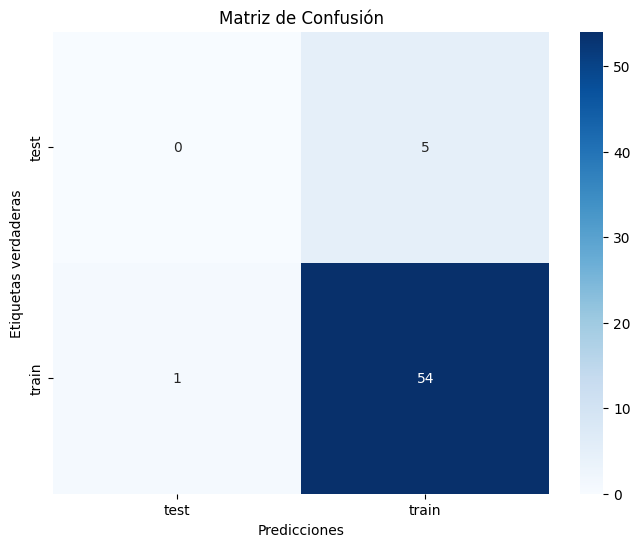

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar predicciones y etiquetas verdaderas
all_labels = []
all_preds = []

model.eval()
with torch.no_grad():
  for inputs, labels in val_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

    all_labels.extend(labels.cpu().numpy())
    all_preds.extend(preds.cpu().numpy())

# Generar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(all_labels, all_preds, target_names=original_dataset.classes))

# Matriz de confusión
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=original_dataset.classes, yticklabels=original_dataset.classes)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()